In [36]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [12]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
data_path = '../data/p1ch7/'

cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

100%|██████████| 170498071/170498071 [00:02<00:00, 73786201.75it/s]


Extracting ../data/p1ch7/cifar-10-python.tar.gz to ../data/p1ch7/
Files already downloaded and verified


In [4]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [5]:
len(cifar10)

50000

In [14]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

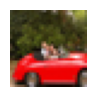

In [20]:
plt.figure(figsize=(1, 1))
plt.imshow(img)
plt.axis('off');

In [22]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [23]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [25]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [26]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [27]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [28]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

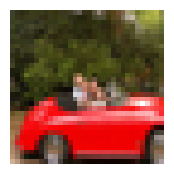

In [31]:
plt.figure(figsize=(2, 2))
plt.imshow(img_t.permute(1, 2, 0))
plt.axis('off');

In [34]:
type(tensor_cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [82]:
imgs = torch.stack([img for img, _ in tensor_cifar10], dim=3)
imgs.shape # really hard to visualize the stack

torch.Size([3, 32, 32, 50000])

#### Corollary: Visualizing the stack

In [84]:
def create_tensor(start):
    return torch.tensor([[[start, start + 1], [start + 2, start + 3]],
                         [[start + 4, start + 5], [start + 6, start + 7]],
                         [[start + 8, start + 9], [start + 10, start + 11]]])

sub_i1 = create_tensor(1)
sub_i2 = create_tensor(12)
sub_i3 = create_tensor(23)
sub_i4 = create_tensor(34)

In [85]:
sub_i1, sub_i2, sub_i3, sub_i4

(tensor([[[ 1,  2],
          [ 3,  4]],
 
         [[ 5,  6],
          [ 7,  8]],
 
         [[ 9, 10],
          [11, 12]]]),
 tensor([[[12, 13],
          [14, 15]],
 
         [[16, 17],
          [18, 19]],
 
         [[20, 21],
          [22, 23]]]),
 tensor([[[23, 24],
          [25, 26]],
 
         [[27, 28],
          [29, 30]],
 
         [[31, 32],
          [33, 34]]]),
 tensor([[[34, 35],
          [36, 37]],
 
         [[38, 39],
          [40, 41]],
 
         [[42, 43],
          [44, 45]]]))

In [86]:
sub_stacked = torch.stack([sub_i1, sub_i2, sub_i3, sub_i4], dim=3)
sub_stacked

tensor([[[[ 1, 12, 23, 34],
          [ 2, 13, 24, 35]],

         [[ 3, 14, 25, 36],
          [ 4, 15, 26, 37]]],


        [[[ 5, 16, 27, 38],
          [ 6, 17, 28, 39]],

         [[ 7, 18, 29, 40],
          [ 8, 19, 30, 41]]],


        [[[ 9, 20, 31, 42],
          [10, 21, 32, 43]],

         [[11, 22, 33, 44],
          [12, 23, 34, 45]]]])

In [87]:
sub_stacked.view(3, -1)

tensor([[ 1, 12, 23, 34,  2, 13, 24, 35,  3, 14, 25, 36,  4, 15, 26, 37],
        [ 5, 16, 27, 38,  6, 17, 28, 39,  7, 18, 29, 40,  8, 19, 30, 41],
        [ 9, 20, 31, 42, 10, 21, 32, 43, 11, 22, 33, 44, 12, 23, 34, 45]])